In [1]:
import pandas as pd

    
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)

In [2]:
pima.head()
#from pandas import set_option
#set_option('precision', 3)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.shape

(768, 9)

In [4]:
types=pima.dtypes
print(types)

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object


In [5]:
class_counts = pima.groupby('label').size()
print(class_counts)

label
0    500
1    268
dtype: int64


In [6]:
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)
correlation=pima.corr(method='pearson')
print(correlation)

          pregnant  glucose     bp   skin  insulin    bmi  pedigree    age  label
pregnant     1.000    0.129  0.141 -0.082   -0.074  0.018    -0.034  0.544  0.222
glucose      0.129    1.000  0.153  0.057    0.331  0.221     0.137  0.264  0.467
bp           0.141    0.153  1.000  0.207    0.089  0.282     0.041  0.240  0.065
skin        -0.082    0.057  0.207  1.000    0.437  0.393     0.184 -0.114  0.075
insulin     -0.074    0.331  0.089  0.437    1.000  0.198     0.185 -0.042  0.131
bmi          0.018    0.221  0.282  0.393    0.198  1.000     0.141  0.036  0.293
pedigree    -0.034    0.137  0.041  0.184    0.185  0.141     1.000  0.034  0.174
age          0.544    0.264  0.240 -0.114   -0.042  0.036     0.034  1.000  0.238
label        0.222    0.467  0.065  0.075    0.131  0.293     0.174  0.238  1.000


In [7]:
skew=pima.skew()
print(skew)

pregnant    0.902
glucose     0.174
bp         -1.844
skin        0.109
insulin     2.272
bmi        -0.429
pedigree    1.920
age         1.130
label       0.635
dtype: float64


In [8]:
#histogram to check skewness of graph
from matplotlib import pyplot
set_option('display.width', 100)
pima.hist()
pyplot.show()

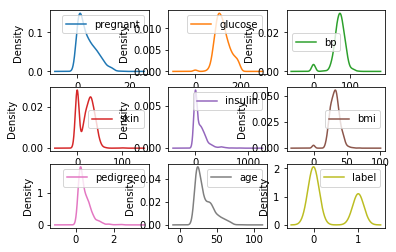

In [9]:
#density plots
pima.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

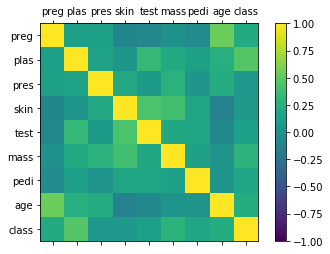

In [10]:
#Box and whisker plots
import numpy
correlations = pima.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

# DATA PROCESSING

You almost always need to pre-process your data. It is a required step. A diculty is that
dierent algorithms make dierent assumptions about your data and may require dierent
transforms. Further, when you follow all of the rules and prepare your data, sometimes algorithms
can deliver better results without pre-processing.

In [11]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = pima.values#values is to convert data frame into n-dimensional array
print(type(array))
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
set_printoptions(precision=0)
print(X[0:5,:])

<class 'numpy.ndarray'>
[[6.e+00 1.e+02 7.e+01 4.e+01 0.e+00 3.e+01 6.e-01 5.e+01]
 [1.e+00 8.e+01 7.e+01 3.e+01 0.e+00 3.e+01 4.e-01 3.e+01]
 [8.e+00 2.e+02 6.e+01 0.e+00 0.e+00 2.e+01 7.e-01 3.e+01]
 [1.e+00 9.e+01 7.e+01 2.e+01 9.e+01 3.e+01 2.e-01 2.e+01]
 [0.e+00 1.e+02 4.e+01 4.e+01 2.e+02 4.e+01 2.e+00 3.e+01]]


In [12]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = pima.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [13]:
from sklearn.preprocessing import StandardScaler
array = pima.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [14]:
from sklearn.preprocessing import Binarizer
array = pima.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [15]:
from sklearn.preprocessing import Normalizer
array = pima.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


# FEATURE SELECTION FOR MACHINE LEARNING

# Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with
the output variable. The scikit-learn library provides the SelectKBest class2 that can be used
with a suite of dierent statistical tests to select a specic number of features.

In [16]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
array = pima.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)#chi-squared (chi2) statistical test for non-negative features to select 4 of the bestfeatures from the Pima Indians onset of diabetes dataset.
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


# Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and
building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [17]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
array = pima.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: ", fit.n_features_)
print("Selected Features:", fit.support_)
print("Feature Ranking: ",fit.ranking_)

Num Features:  3
Selected Features: [ True False False False False  True  True False]
Feature Ranking:  [1 2 3 5 6 1 1 4]


# PRINCIPAL COMPONENT ANALYSIS

In [18]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
array = pima.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: ",fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance:  [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


# FEATURE IMPORTANCE
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance
of features. In the example below we construct a ExtraTreesClassifier classier for the Pima
Indians onset of diabetes dataset.


In [19]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
array = pima.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.108 0.236 0.101 0.074 0.072 0.146 0.117 0.146]


In [20]:
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [21]:
featured_column=['pregnant','bmi','insulin','age']
x=pima[featured_column]#We will take only this columns to decide whther the person is diabetic or not
y=pima['label']#This will be the final answer

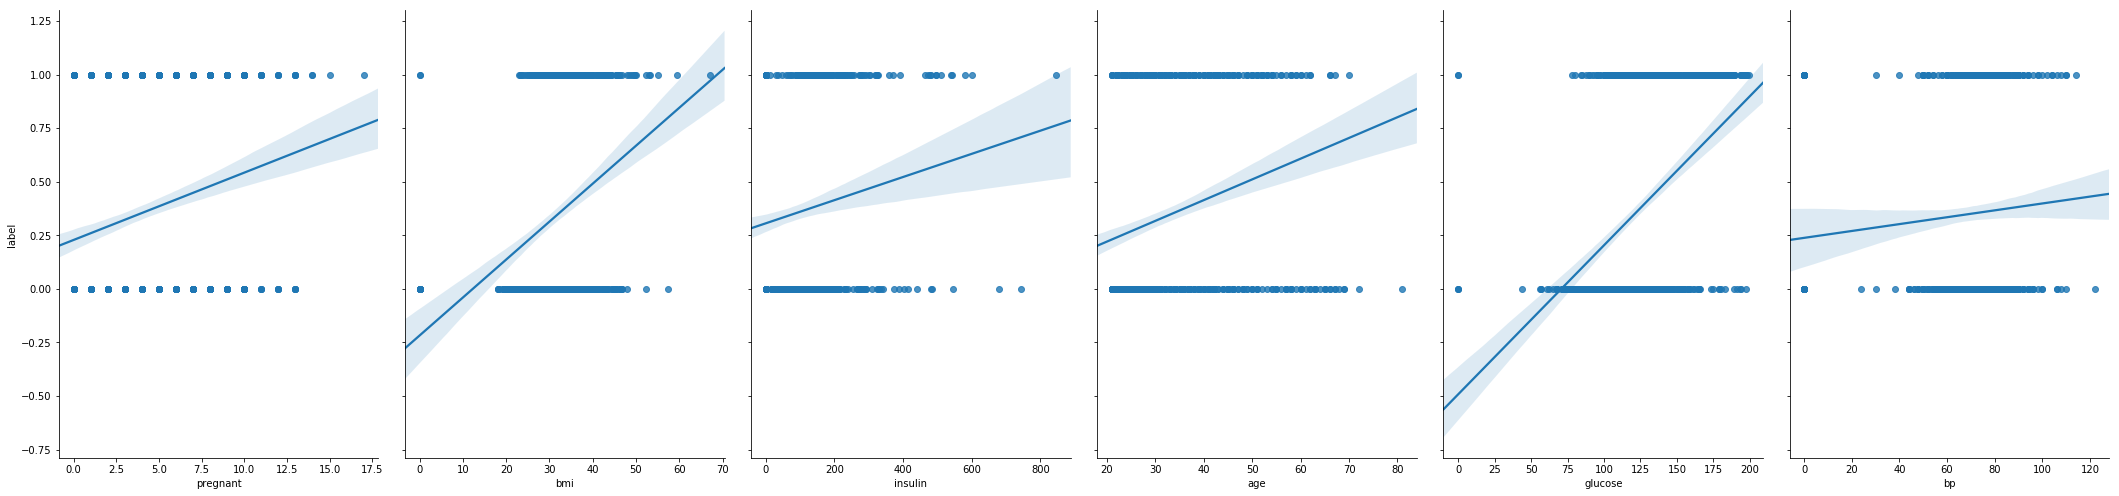

In [22]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline
sns.pairplot(pima, x_vars=['pregnant','bmi','insulin','age','glucose','bp'], y_vars='label', size=7, aspect=0.7, kind='reg')

In [23]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
#x_train.shape
#x_test.shape
#y_train.shape
y_test.shape

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(192,)

In [24]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
#description is homework

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
# make class predictions for the testing set
y_pred_class = logreg.predict(x_test)

In [26]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


In [28]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [29]:
type(y_test)

pandas.core.series.Series

In [30]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
from flask import Flask
from flask import request
from flask_cors import CORS
from flask import render_template
from flask_cors import CORS
app = Flask(__name__)
CORS(app)
@app.route("/logreg/<bmi>/<insulin>")
def diabetic_response(bmi,insulin):
    x_test=pd.DataFrame([[35,bmi,insulin,52]])
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    predicted_logreg= logreg.predict(x_test)
    print(predicted_logreg)
    if predicted_logreg[0] == 1:
        return "Sorry,you are diabetic"
    else:
        return "You are not diabetic"

In [ ]:
app.run(host='0.0.0.0',port=5004)

 * Running on http://0.0.0.0:5004/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Mar/2018 21:07:20] "GET /logreg/18/67 HTTP/1.1" 200 -


[1]


127.0.0.1 - - [05/Mar/2018 21:07:36] "GET /logreg/18/34 HTTP/1.1" 200 -


[1]


127.0.0.1 - - [05/Mar/2018 21:07:51] "GET /logreg/18.9/34 HTTP/1.1" 200 -


[1]


127.0.0.1 - - [05/Mar/2018 21:07:59] "GET /logreg/18.9/90 HTTP/1.1" 200 -


[1]


127.0.0.1 - - [05/Mar/2018 21:08:11] "GET /logreg/18.9/67 HTTP/1.1" 200 -


[1]


127.0.0.1 - - [05/Mar/2018 21:09:06] "GET /logreg/18.9/0 HTTP/1.1" 200 -


[1]


127.0.0.1 - - [05/Mar/2018 21:09:22] "GET /logreg/33.6/0 HTTP/1.1" 200 -


[1]
